# Print as it is, redesign, cannot be 3d-printed

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

- Data preprocessing

In [16]:
#Let's import data
file = 'Data_v1.xlsx'
#we need to transpose
data = pd.read_excel(file, index_col = 0).transpose()
#dropping null values
data_new = data.loc[:,data.columns.notnull()]


In [34]:
data_new.head()

Features,Functional surface (FS) (mm2),Overall surface (OS) (mm2),FS/OS,Part volume (mm3),Bounding box volume,PV/BV,Aspect ratio,Minimum feature size,Easy post-processing?,Heat treatment required if 3D printed?,Requires extensive machining or Tight tolerance (0.08-0.1mm)?,Max batch size,Label
1-pelton bucket,2320.6317,6493.7758,0.303703,5120.6951,48000.00,0.106681,276.809524,0.21,0.0,0.0,0.0,30.0,2.0
2-bell housing,29592.8227,112599.1637,0.262816,534059.7338,3400000.00,0.157076,14.166667,6.00,1.0,0.0,1.0,1.0,2.0
3- Piston rod,1336.5539,16750.6689,0.079791,35231.9503,244920.00,0.143851,52.683533,3.00,1.0,0.0,1.0,29.0,1.0
4-lifeboat hook camshaft,16481.3297,16481.3297,1.000000,73027.1103,172518.56,0.423000,35.828571,3.50,1.0,0.0,1.0,35.0,1.0
5-Brake caliper frame,4209.8300,168958.6900,0.024916,388227.6200,3310140.45,0.117284,107.527426,2.37,1.0,0.0,0.0,1.0,2.0


In [35]:
# Data exploration
print(data.isnull().any())
print("shape is ", data.shape)
#below false values are just blank rows

Features
Functional surface (FS) (mm2)                                    False
Overall surface (OS) (mm2)                                       False
FS/OS                                                            False
Part volume (mm3)                                                False
Bounding box volume                                              False
PV/BV                                                            False
Aspect ratio                                                     False
NaN                                                               True
Minimum feature size                                             False
Easy post-processing?                                            False
Heat treatment required if 3D printed?                           False
Requires extensive machining or Tight tolerance (0.08-0.1mm)?    False
NaN                                                               True
Max batch size                                                   Fal

In [36]:
X_cat = data_new[['Requires extensive machining or Tight tolerance (0.08-0.1mm)?', 'Easy post-processing?', 'Heat treatment required if 3D printed?']]
X_num = data_new[['Functional surface (FS) (mm2)', 'Overall surface (OS) (mm2)','Part volume (mm3)', 'Bounding box volume', 'Aspect ratio', 'Minimum feature size', 'Max batch size']]
y_data = data_new['Label']

In [38]:
X_num

Features,Functional surface (FS) (mm2),Overall surface (OS) (mm2),Part volume (mm3),Bounding box volume,Aspect ratio,Minimum feature size,Max batch size
1-pelton bucket,2320.6317,6493.7758,5120.6951,48000.00,276.809524,0.21,30.0
2-bell housing,29592.8227,112599.1637,534059.7338,3400000.00,14.166667,6.00,1.0
3- Piston rod,1336.5539,16750.6689,35231.9503,244920.00,52.683533,3.00,29.0
4-lifeboat hook camshaft,16481.3297,16481.3297,73027.1103,172518.56,35.828571,3.50,35.0
5-Brake caliper frame,4209.8300,168958.6900,388227.6200,3310140.45,107.527426,2.37,1.0
...,...,...,...,...,...,...,...
96-Lotus Elise Front Hub Carrier,17659.0278,101613.9695,439734.7695,1462277.50,27.196667,6.00,4.0
97-Pelton turbine runner,6032.8569,30827.2229,49282.2881,731520.00,40.000000,3.00,4.0
98-Truck socket 15-pole ADR 24V part,1245.0724,14215.6746,23622.5736,62158.72,30.000000,1.50,30.0
99-heat sink,33978.3488,40835.7140,50142.4844,118670.34,62.500000,1.60,6.0


In [51]:
X_temp=np.log10(X_num.drop(['Minimum feature size'], axis=1))
X_temp

Features,Functional surface (FS) (mm2),Overall surface (OS) (mm2),Part volume (mm3),Bounding box volume,Aspect ratio,Max batch size
1-pelton bucket,3.365606,3.812497,3.709329,4.681241,2.442181,1.477121
2-bell housing,4.471186,5.051535,5.727590,6.531479,1.151268,0.000000
3- Piston rod,3.125986,4.224032,4.546937,5.389024,1.721675,1.462398
4-lifeboat hook camshaft,4.216992,4.216992,4.863484,5.236836,1.554229,1.544068
5-Brake caliper frame,3.624265,5.227781,5.589086,6.519846,2.031519,0.000000
...,...,...,...,...,...,...
96-Lotus Elise Front Hub Carrier,4.246967,5.006953,5.643191,6.165030,1.434516,0.602060
97-Pelton turbine runner,3.780523,4.488934,4.692691,5.864226,1.602060,0.602060
98-Truck socket 15-pole ADR 24V part,3.095195,4.152767,4.373327,4.793502,1.477121,1.477121
99-heat sink,4.531202,4.611040,4.700206,5.074342,1.795880,0.778151


In [77]:
min_feature_size = X_num.iloc[:,5]
min_feature_size
# X_num1=pd.DataFrame(np.concatenate([X_num.loc[:,'Minimum feature size'], X_temp], axis=1))
# X_num1


1-pelton bucket                         0.21
2-bell housing                          6.00
3- Piston rod                           3.00
4-lifeboat hook camshaft                3.50
5-Brake caliper frame                   2.37
                                        ... 
96-Lotus Elise Front Hub Carrier        6.00
97-Pelton turbine runner                3.00
98-Truck socket 15-pole ADR 24V part    1.50
99-heat sink                            1.60
100-Split pillow block housing          5.00
Name: Minimum feature size, Length: 100, dtype: float64

In [82]:
X_num=X_temp.join(min_feature_size)
X_cat

Features,Requires extensive machining or Tight tolerance (0.08-0.1mm)?,Easy post-processing?,Heat treatment required if 3D printed?
1-pelton bucket,0.0,0.0,0.0
2-bell housing,1.0,1.0,0.0
3- Piston rod,1.0,1.0,0.0
4-lifeboat hook camshaft,1.0,1.0,0.0
5-Brake caliper frame,0.0,1.0,0.0
...,...,...,...
96-Lotus Elise Front Hub Carrier,1.0,0.0,0.0
97-Pelton turbine runner,1.0,0.0,0.0
98-Truck socket 15-pole ADR 24V part,0.0,0.0,0.0
99-heat sink,0.0,0.0,1.0


In [83]:
X_num


,Functional surface (FS) (mm2),Overall surface (OS) (mm2),Part volume (mm3),Bounding box volume,Aspect ratio,Max batch size,Minimum feature size
1-pelton bucket,3.365606,3.812497,3.709329,4.681241,2.442181,1.477121,0.21
2-bell housing,4.471186,5.051535,5.727590,6.531479,1.151268,0.000000,6.00
3- Piston rod,3.125986,4.224032,4.546937,5.389024,1.721675,1.462398,3.00
4-lifeboat hook camshaft,4.216992,4.216992,4.863484,5.236836,1.554229,1.544068,3.50
5-Brake caliper frame,3.624265,5.227781,5.589086,6.519846,2.031519,0.000000,2.37
...,...,...,...,...,...,...,...
96-Lotus Elise Front Hub Carrier,4.246967,5.006953,5.643191,6.165030,1.434516,0.602060,6.00
97-Pelton turbine runner,3.780523,4.488934,4.692691,5.864226,1.602060,0.602060,3.00
98-Truck socket 15-pole ADR 24V part,3.095195,4.152767,4.373327,4.793502,1.477121,1.477121,1.50
99-heat sink,4.531202,4.611040,4.700206,5.074342,1.795880,0.778151,1.60


In [87]:
X_data=pd.DataFrame(np.concatenate([X_num, X_cat], axis=1))
X_data.columns = ['Functional surface (FS) (mm2)', 'Overall surface (OS) (mm2)', 'Part volume (mm3)', 'Bounding box volume', 'Aspect ratio', 'Max batch size', 'Minimum feature size', 'Requires extensive machining or Tight tolerance (0.08-0.1mm)?', 'Easy post-processing?', 'Heat treatment required if 3D printed?' ]

In [88]:
X_data

,Functional surface (FS) (mm2),Overall surface (OS) (mm2),Part volume (mm3),Bounding box volume,Aspect ratio,Max batch size,Minimum feature size,Requires extensive machining or Tight tolerance (0.08-0.1mm)?,Easy post-processing?,Heat treatment required if 3D printed?
0,3.365606,3.812497,3.709329,4.681241,2.442181,1.477121,0.21,0.0,0.0,0.0
1,4.471186,5.051535,5.727590,6.531479,1.151268,0.000000,6.00,1.0,1.0,0.0
2,3.125986,4.224032,4.546937,5.389024,1.721675,1.462398,3.00,1.0,1.0,0.0
3,4.216992,4.216992,4.863484,5.236836,1.554229,1.544068,3.50,1.0,1.0,0.0
4,3.624265,5.227781,5.589086,6.519846,2.031519,0.000000,2.37,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
95,4.246967,5.006953,5.643191,6.165030,1.434516,0.602060,6.00,1.0,0.0,0.0
96,3.780523,4.488934,4.692691,5.864226,1.602060,0.602060,3.00,1.0,0.0,0.0
97,3.095195,4.152767,4.373327,4.793502,1.477121,1.477121,1.50,0.0,0.0,0.0
98,4.531202,4.611040,4.700206,5.074342,1.795880,0.778151,1.60,0.0,0.0,1.0


## Data exploration & Visualization

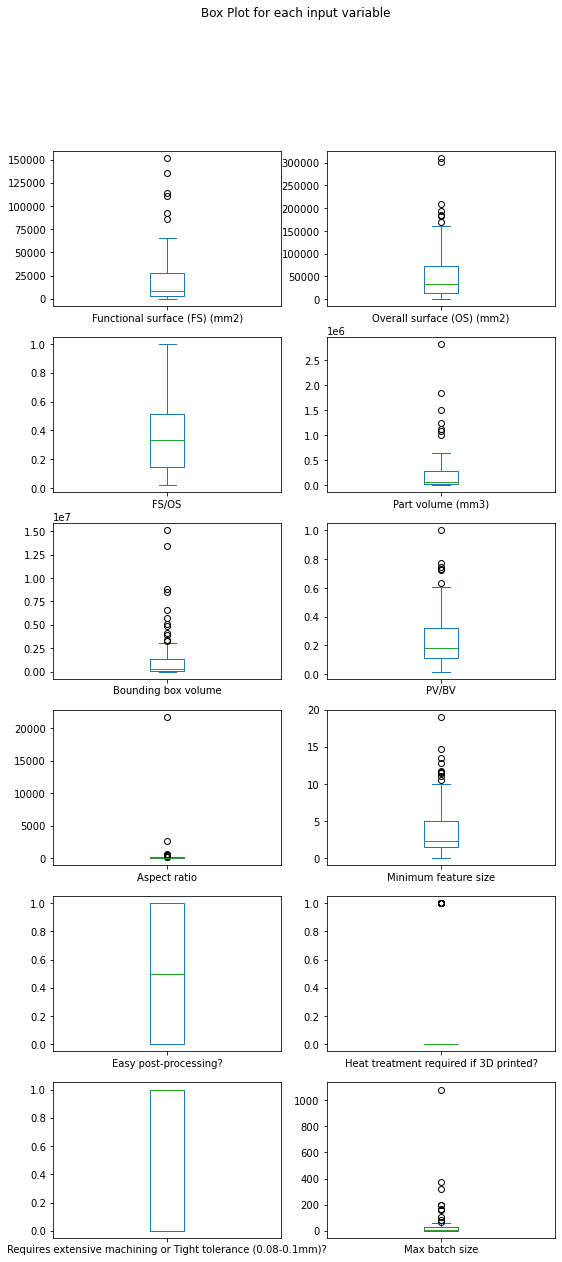

In [89]:
data_new.drop('Label',axis=1).plot(kind='box',
                                    subplots=True,
                                    layout=(6,2),
                                   sharex=False,
                                   sharey=False,
                                   figsize=(9,20),
                                   title='Box Plot for each input variable')
plt.savefig('input_box')
plt.show()

In [90]:
#split data into training and testing sets
def split_train_test(Xdata, ydata, test_ratio, rseed):
    # random
    if rseed == 0: 
        shuffled_indices = np.random.permutation(len(Xdata))
    # fixed by rseed
    else:
        shuffled_indices = np.random.RandomState(seed=rseed).permutation(len(Xdata))
    # test size 지정
    test_set_size = int(len(Xdata)*test_ratio) 
    test_indices = shuffled_indices[:test_set_size].tolist() 
    train_indices = shuffled_indices[test_set_size:].tolist()
    
    return Xdata.iloc[train_indices,:], Xdata.iloc[test_indices,:], \
ydata.iloc[train_indices], ydata.iloc[test_indices]

In [91]:
X_train, X_test, y_train, y_test = split_train_test(X_data, y_data, 0.20, 0) 

In [92]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer


# cat_attribs = ['Easy post-processing?',
#               'Heat treatment required if 3D printed?',
#               'Requires extensive machining or Tight tolerance (0.08-0.1mm)?']
#num_attribs = X_data.columns.drop(cat_attribs)

scaler = MinMaxScaler()
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)

# X_train_num = scaler.fit_transform(X_train[num_attribs])
# X_train_cat = enc.fit_transform(X_train[cat_attribs])
# X_train_proc = np.concatenate([X_train_num,X_train_cat],axis=1)
X_train_proc = scaler.fit_transform(X_train)

# X_test_num = scaler.transform(X_test[num_attribs])
# X_test_cat = enc.transform(X_test[cat_attribs])
# X_test_proc = np.concatenate([X_test_num,X_test_cat],axis=1)
X_test_proc = scaler.fit_transform(X_test)

In [93]:
# crossvalidations
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV

# models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
## evaluation metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
def confusion_mat(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred, normalize=None)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues) #Reds, rainbow
    return plt.show()

LR 43.000% +/-15.033
KNN 35.000% +/-7.071
CART 40.000% +/-9.487
SVM 41.000% +/-14.629
GBM 37.000% +/-15.684


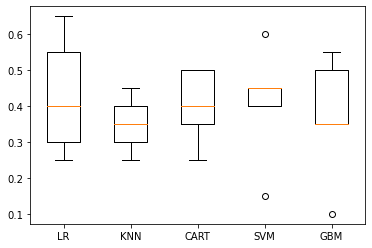

In [96]:
from numpy import mean
from numpy import std
from matplotlib import pyplot

#create a list of models to evaluate
models, names = list(),list()
#logistic
models.append(LogisticRegression())
names.append('LR')
#knn
models.append(KNeighborsClassifier())
names.append('KNN')
# cart
models.append(DecisionTreeClassifier())
names.append('CART')
# svm
models.append(SVC())
names.append('SVM')
# random forest
models.append(RandomForestClassifier())
names.append('GBM')

# evaluate models
all_scores = list()
for i in range(len(models)):
    # create a pipeline for the model
    p = Pipeline(steps=[('m',models[i])])
    scores = cross_val_score(p,X_data,y_data,scoring='accuracy', cv=5, n_jobs=-1)
    all_scores.append(scores)
    # summarize
    m, s = mean(scores)*100, std(scores)*100
    print('%s %.3f%% +/-%.3f' %(names[i], m, s))

# plot
pyplot.boxplot(all_scores, labels=names)
pyplot.show()

## KNN

In [98]:
KNN_all_scores = list()

for k in range(1,22):
    # evaluate
    model = KNeighborsClassifier(n_neighbors=k)
    KNN_model = Pipeline(steps=[('m',model)])
    KNN_model.fit(X_train_proc, y_train)
    # predict
    yhat = KNN_model.predict(X_test_proc)
    # evaluate
    score1 = accuracy_score(y_test, yhat)*100

    print('%s %.3f%%' %(str(k),score1))

1 55.000%
2 50.000%
3 40.000%
4 40.000%
5 45.000%
6 40.000%
7 25.000%
8 40.000%
9 40.000%
10 45.000%
11 50.000%
12 40.000%
13 50.000%
14 40.000%
15 40.000%
16 45.000%
17 50.000%
18 50.000%
19 50.000%
20 45.000%
21 50.000%


## SVM

In [99]:
# Search space

param_grid = {
    'C': [0.001,1,10,100],
    'gamma': [1,0.1,0.01,0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

In [101]:
temp_model = SVC()
svc_random = RandomizedSearchCV(estimator=temp_model,
                               param_distributions=param_grid,
                               n_iter = 48,
                               cv=5,
                               scoring = 'accuracy',
                               verbose = 2,
                               )



svc_random.fit(X_train_proc, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.001, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time=   0.0s
[CV] END ......................C=0.001, gamma=1, kernel=poly; total time=   0.0s
[CV] END ...................C=0.001, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END ...................C=0.001, gamma=1, k

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=48,
                   param_distributions={'C': [0.001, 1, 10, 100],
                                        'gamma': [1, 0.1, 0.01, 0.001],
                                        'kernel': ['rbf', 'poly', 'sigmoid']},
                   scoring='accuracy', verbose=2)

In [102]:
SVM_model = svc_random.best_estimator_
yhat = SVM_model.predict(X_test_proc)
SVM_acc = accuracy_score(y_test, yhat)*100
SVM_prec = precision_score(y_test, yhat, average='macro')*100
SVM_recall = recall_score(y_test,yhat,average='macro')*100
SVM_f1 = f1_score(y_test,yhat,average='macro')*100
confusion = confusion_matrix(y_test, yhat)

print('accuracy %.3f%%' %(SVM_acc))
print('precision %.3f%%' %(SVM_prec))
print('recall %.3f%%' %(SVM_recall))
print('f1_score %.3f%%' %(SVM_f1))
print(confusion)
#class_names = ['Not recommended for SLM = 0']

accuracy 40.000%
precision 54.978%
recall 43.122%
f1_score 39.057%
[[2 0 2]
 [2 2 5]
 [3 0 4]]


## Random Forest

In [104]:
rf_n_estimators = [int(x) for x in np.linspace(200, 1000, 5)]
rf_n_estimators.append(1500)
rf_n_estimators.append(2000)
rf_max_depth = [int(x) for x in np.linspace(5, 55, 11)]
rf_max_depth.append(None)
rf_max_features = ['auto', 'sqrt', 'log2']
rf_criterion = ['gini', 'entropy']
rf_min_samples_split = [int(x) for x in np.linspace(2, 10, 9)]
rf_min_impurity_decrease = [0.0, 0.05, 0.1]
rf_bootstrap = [True, False]

In [105]:
rf_grid = {'n_estimators': rf_n_estimators,
               'max_depth': rf_max_depth,
               'max_features': rf_max_features,
               'criterion': rf_criterion,
               'min_samples_split': rf_min_samples_split,
               'min_impurity_decrease': rf_min_impurity_decrease,
               'bootstrap': rf_bootstrap}

rf_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1500, 2000],
 'max_depth': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, None],
 'max_features': ['auto', 'sqrt', 'log2'],
 'criterion': ['gini', 'entropy'],
 'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
 'min_impurity_decrease': [0.0, 0.05, 0.1],
 'bootstrap': [True, False]}

In [106]:
temp_model = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=temp_model,
                               param_distributions=rf_grid,
                               n_iter = 60,
                               cv=5,
                               scoring = 'accuracy',
                               verbose = 2,
                               )
rf_random.fit(X_train_proc, y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV] END bootstrap=False, criterion=entropy, max_depth=45, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=800; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=45, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=45, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=45, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=800; total time=   0.5s
[CV] END bootstrap=False, criterion=entropy, max_depth=45, max_features=sqrt, min_impurity_decrease=0.1, min_samples_split=10, n_estimators=800; total time=   0.4s
[CV] END bootstrap=False, criterion=entropy, max_depth=5, max_features=auto, min_impurity_decrease=0.1, min_samples_sp

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=60,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, 55, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_impurity_decrease': [0.0, 0.05,
                                                                  0.1],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1500, 2000]},
                   scoring='accur

In [107]:
rf_model = rf_random.best_estimator_
#print(rf_random.best_params_)
yhat = rf_model.predict(X_test_proc)
rf_score = accuracy_score(y_test, yhat)*100
rf_score2 = precision_score(y_test, yhat,average='macro')*100
rf_recall = recall_score(y_test,yhat,average='macro')*100
rf_f1 = f1_score(y_test,yhat,average='macro')*100
confusion = confusion_matrix(y_test, yhat)

print('%.3f%%' %(rf_score))
print('%.3f%%' %(rf_score2))
print('%.3f%%' %(rf_recall))
print('%.3f%%' %(rf_f1))    
print(confusion)

40.000%
56.710%
46.693%
39.740%
[[3 0 1]
 [4 2 3]
 [4 0 3]]


Text(0.5, 0, 'RF Feature Importance')

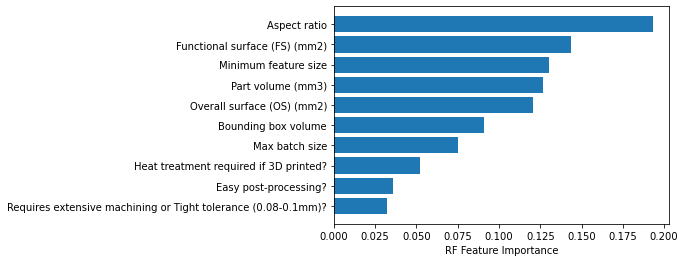

In [109]:
# check feature importance
sorted_idx = rf_model.feature_importances_.argsort()
plt.barh(X_data.columns[sorted_idx], rf_model.feature_importances_[sorted_idx])
plt.xlabel("RF Feature Importance")